# 線形代数の概要
## 目的
- 回帰分析に必要になりそうな線形代数の定理，補題等を簡単にまとめる．
- 数値計算でイメージを掴む．

In [1]:
import numpy as np
import scipy
from scipy import linalg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

## 行列と行列式
### 行列の階数と逆行列
$A \in \boldsymbol{R}^{p \times q}$

1. $A$の一次独立な行(列)ベクトルの数を$A$のrankといい，$\mbox{rank}(A)$と表す．
2. $\mbox{rank}(A) = q$のとき，full-column rank, $\mbox{rank}(A) = p$のとき，full-row rank．
3. $A \in \boldsymbol{R}^{p \times p}, \mbox{rank}(A) = p$のとき，$A$は正則であるという．$p$次の正則行列全体を$GL_p(\boldsymbol{R})$で表す．

$A \in GL_p(\boldsymbol{R}) \Leftrightarrow \exists A^{-1}  \Leftrightarrow \mbox{det}(A) \neq 0$である．

行列の階数に対して，以下が成り立つ．

1. - $A \in \boldsymbol{R}^{p \times q}, B \in \boldsymbol{R}^{q \times r} \Rightarrow \mbox{rank}(AB) \leq \min\{\mbox{rank}(A), \mbox{rank}(B)\}$
    - $A, B \in \boldsymbol{R}^{p \times q} \Rightarrow \mbox{rank}(A + B) \leq \mbox{rank}(A) + \mbox{rank}(B)$
    - $A \in \boldsymbol{R}^{p \times q}, B \in GL_q(\boldsymbol{R}) \Rightarrow \mbox{rank}(AB) = \mbox{rank}(A)$
    - $A \in \boldsymbol{R}^{p \times q} \Rightarrow \mbox{rank}(A) = \mbox{rank}(A^{\mbox{T}}) = \mbox{rank}(A^{\mbox{T}}A) = \mbox{rank}(AA^{\mbox{T}})$
2. $A \in \boldsymbol{R}^{p \times p}$を対称行列とする．このとき，$A$の固有値は実数であり，異なる固有値に対応する固有ベクトルは互いに直交する．

ここで，$AA^{\mbox{T}}, A^{\mbox{T}}A$をグラム行列という．

一般に，$\mbox{rank}(A^2) \neq \mbox{rank}(A)$である(e.g. べき零行列)．

AB = [[ 14  33  49  12]
 [ 34  80 118  28]
 [ 45 106 157  38]], rank(AB) = 2, rank(A) = 2, rank(B) = 3
A+B = [[ 2  4  6  8 10]
 [ 4  8 16 17 22]
 [ 6 12 20 20 22]], rank(A+B) = 3, rank(A) = 2, rank(B) = 3
AB = [[ 30  69  57  59]
 [ 66 152 134 132]
 [ 93 214 181 184]], rank(AB) = 2, rank(A) = 2
A^T = [[1 2 3]
 [2 3 1]], rank(A^T) = 2
A^T A = [[14 11]
 [11 14]], rank(A^T A) = 2
AA^T = [[ 5  8  5]
 [ 8 13  9]
 [ 5  9 10]], rank(AA^T) = 2, rank(A) = 2
(v_1, v_2) = -1.212722197559916e-17


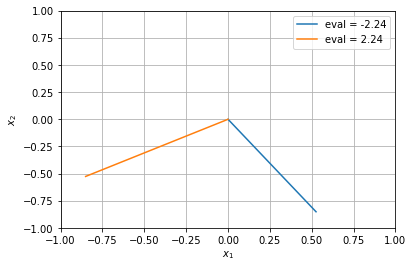

In [2]:
# Example (rank of the matrix)
### A: 3*3, rank(A) = 2
A1 = np.array([
    [1, 2, 3], 
    [2, 4, 8],
    [3, 6, 10]
])
### B: 3 * 4, rank(B) = 3
B1 = np.array([
    [1, 2, 3, 4], 
    [2, 5, 8, 1],
    [3, 7, 10, 2]
])
print("AB = {}, rank(AB) = {}, rank(A) = {}, rank(B) = {}".format(A1@B1, np.linalg.matrix_rank(A1@B1), np.linalg.matrix_rank(A1), np.linalg.matrix_rank(B1)))

### A: 3*5, rank(A) = 2
A2 = np.array([
    [1, 2, 3, 4, 5], 
    [2, 4, 8, 8, 10],
    [3, 6, 10, 12, 15]
])
### B: 3*5, rank(B) = 3
B2 = np.array([
    [1, 2, 3, 4, 5], 
    [2, 4, 8, 9, 12],
    [3, 6, 10, 8, 7]
])
print("A+B = {}, rank(A+B) = {}, rank(A) = {}, rank(B) = {}".format(A2+B2, np.linalg.matrix_rank(A2+B2), np.linalg.matrix_rank(A2), np.linalg.matrix_rank(B2)))

### A: 3*4, rank(A) = 2
A3 = np.array([
    [1, 2, 3, 4], 
    [2, 4, 8, 8],
    [3, 6, 10, 12]
])
### B: 4*4, rank(B) = 4
B3 = np.array([
    [1, 2, 3, 4], 
    [2, 5, 8, 15],
    [3, 7, 10, 7],
    [4, 9, 2, 1]
])
print("AB = {}, rank(AB) = {}, rank(A) = {}".format(A3@B3, np.linalg.matrix_rank(A3@B3), np.linalg.matrix_rank(A3)))

### A: 2*3, rank(A) = 2
A3 = np.array([
    [1, 2], 
    [2, 3],
    [3, 1]
])
print("A^T = {}, rank(A^T) = {}".format(A3.T, np.linalg.matrix_rank(A3.T)))
print("A^T A = {}, rank(A^T A) = {}".format(A3.T@A3, np.linalg.matrix_rank(A3.T@A3)))
print("AA^T = {}, rank(AA^T) = {}, rank(A) = {}".format(A3@A3.T, np.linalg.matrix_rank(A3@A3.T), np.linalg.matrix_rank(A3)))

### A: 2*2 (Symmetry)
A4 = np.array([
    [1, 2],
    [2, -1]
])
evalA, evecA = scipy.linalg.eigh(A4)
inner_pr = np.dot(evecA[0], evecA[1])
print("(v_1, v_2) = {}".format(inner_pr))
### color cycle (matplotlib) ###
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim([-1, 1])
ax.set_xlabel(r"$x_1$")
ax.set_ylim([-1, 1])
ax.set_ylabel(r"$x_2$")
for i in range(len(evecA)):
    ax.plot([0, evecA[i][0]], [0, evecA[i][1]], color = color_cycle[i], label="eval = %.2f" %evalA[i])
ax.grid(True)
ax.legend(loc = 'best')
plt.show()